# exploring the actual data we have in the overcast environment

In [1]:
import pandas as pd
import numpy as np
#import overcast

import matplotlib.pyplot as plt
import glob

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/home/jovyan/packages/overcast/data/four_outputs_liqcf_pacific.csv')

In [4]:
data

,Unnamed: 0,tot_aod,tot_ai,RH700,RH850,RH900,EIS,LTS,whoi_sst,l_re,w500,cwp,cod,liq_pc,precip,lats,lons,timestamp
0,14532,0.155610,0.137246,0.818861,0.892751,0.855919,10.984653,15.792933,278.465240,10.050000,-0.026880,218.0,39.639999,0.491525,0.529804,-42.5,-99.5,1.072915e+09
1,14533,0.152167,0.115182,0.774852,0.997687,0.984664,10.470291,15.402502,278.342987,10.690000,-0.030546,307.0,45.480000,0.943363,0.000000,-43.5,-99.5,1.072915e+09
2,14534,0.141191,0.091286,0.764677,0.993856,0.992183,12.237714,15.537168,278.135254,10.429999,-0.035985,216.0,35.880001,0.911414,0.000000,-44.5,-99.5,1.072915e+09
3,14893,0.135990,0.100434,0.705424,0.992619,0.977061,11.044720,17.115450,276.223022,10.090000,0.007842,213.0,35.700001,0.950442,0.462616,-43.5,-97.5,1.072915e+09
4,14894,0.110178,0.073157,0.560533,0.963838,0.991767,11.298848,17.218170,277.746857,9.260000,-0.007619,125.0,21.029999,0.900000,2.705210,-44.5,-97.5,1.072915e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174692,1962850,0.127771,0.045309,0.353642,0.961989,0.923277,3.088211,2.778760,292.838989,25.459999,0.116867,154.0,9.360000,0.415254,2.420449,-40.5,-75.5,1.577750e+09
1174693,1962851,0.126625,0.043505,0.429664,0.928012,0.912782,2.665966,2.342439,292.572296,23.689999,0.170784,77.0,5.150000,0.353556,0.028504,-41.5,-75.5,1.577750e+09
1174694,1962852,0.131525,0.042916,0.452469,0.907575,0.908450,2.762839,2.310330,292.492279,22.740000,0.060224,102.0,6.840000,0.297741,0.007379,-42.5,-75.5,1.577750e+09
1174695,1962853,0.139906,0.042699,0.466143,0.944294,0.900247,3.376083,2.925072,291.674988,22.350000,-0.001340,97.0,6.670000,0.266667,0.038379,-43.5,-75.5,1.577750e+09


array([[<AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

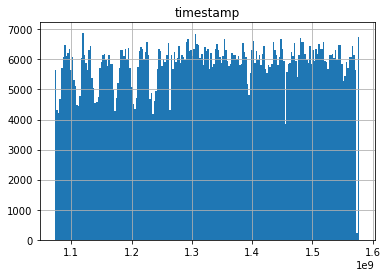

In [5]:
# so this is basically a csv, with varying latitudes and longitudes...and timestamps...

data.hist('timestamp', bins=200)

# Now we want to plot a map?

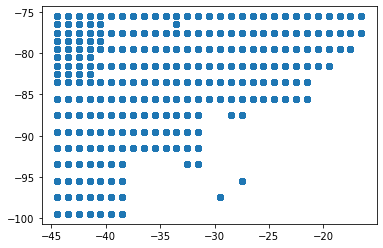

In [6]:
plt.scatter(data['lats'], data['lons'])

In [7]:
!pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [8]:
## Let's just test that we can plot a simple map - does folium work at the moment?

import folium

In [15]:
m = folium.Map(location=[-44.5236, -80.6750], zoom_start = 3)
m

In [18]:
data.lats.unique()

array([-42.5, -43.5, -44.5, -39.5, -40.5, -41.5, -32.5, -33.5, -34.5,
       -35.5, -36.5, -37.5, -38.5, -31.5, -21.5, -22.5, -26.5, -27.5,
       -28.5, -29.5, -30.5, -23.5, -24.5, -25.5, -19.5, -20.5, -17.5,
       -18.5, -16.5])

In [19]:
data.lons.unique()

array([-99.5, -97.5, -95.5, -93.5, -91.5, -89.5, -87.5, -85.5, -83.5,
       -81.5, -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -82.5])

In [25]:
m = folium.Map(location=[-44.5236, -80.6750], zoom_start = 3)


for coord in range(0, len(data.lons.unique())):
    folium.Marker(location=[data['lats'].unique()[coord], data['lons'].unique()[coord]], icon=folium.Icon(icon="info-sign")).add_to(m)

In [26]:
m